<div align='center'>
<font size = 7><font face="Product-Sans"><b><font color= "4285F4">G</font><font color= "DB4437">o</font><font color = "F4B400">o</font><font color= "4285F4">g</font><font color= "0F9D58">l</font><font color= "DB4437">e</font></b></font> - <font color = "C99700">Notre Dame</font></a> <font color = "4285F4">XLS Playground</font></font>
</div>

<div align='center'>
<img src='https://google.github.io/xls/images/xls_logo.svg' alt='XLS Logo' width=400><img src='https://raw.githubusercontent.com/mmorri22/cse30342/main/ND%20Chip%20Logo.png' alt='ND Chip Logo' width=180>
<img src="https://opensource.google/static/images/os-anim-main.gif" width=180>
</div>

<div align='center'>
<font size = 6><font color = "00843D">Lecture 24 In-Class Solution - Introduction to High-Level Synthesis</font></a></font>
</div>

## XLS Setup

For each new Colab notebook, you will need to run the XLS setup again. If your computer switches networks, or you restart, you will need to run those commands again. This consists of the same two setup steps from Chapter 1. You must run both in order to properly run the XLS flow.


> Note: Here is the common error message that will occur if you ran a DSLX cell and you need need to re-run the setup. If you encounter this message, simply re-run these two steps and the error will be resolved when you go back to that cell:
>
> <code>UsageError: Cell magic `%%dslx` not found.</code>

# <font color = "red">Design Run Setup</font>

## To set up the design flow, run the next cell to set up the back end of XLS

> You will need to run this setup at every new runtime instance.

In [ ]:
#@title Start-up Step 1: XLS and OpenRoad scripts {run:"auto"}

!rm -rf *

# Import required Python libraries
import os
import pathlib
import sys
import jinja2
import IPython.display
import PIL.Image
import graphviz
import pathlib

from IPython.display import display, display_png

# Set Stable XLS Version for classroom environment
xls_version = 'v0.0.0-4699-gfb023174' #@param {type:"string"}

!echo '📦 downloading xls-{xls_version}'
!curl --show-error -L https://github.com/proppy/xls/releases/download/{xls_version}/xls-{xls_version}-linux-x64.tar.gz | tar xzf - --strip-components=1
!echo '🧪 setting up colab integration'
!python -m pip install --quiet --no-cache-dir --ignore-installed https://github.com/proppy/xls/releases/download/{xls_version}/xls_colab-0.0.0-py3-none-any.whl
!python -m pip install logger
!python -m pip install colabtools
import logger
import xls.contrib.colab
_ = xls.contrib.colab.register_dslx_magic()

# Must verify xls_work_dir is created
!if test -d xls_work_dir; then echo "xls_work_dir exists"; else mkdir xls_work_dir;  fi

#@title  First Run Only #4 - OpenRoad Setup {run:"auto"}

yosys_version = '0.38_93_g84116c9a3' #@param {type:"string"}
openroad_version = '2.0_12381_g01bba3695' #@param {type:"string"}
rules_hdl_version = '2eb050e80a5c42ac3ffdb7e70392d86a6896dfc7' #@param {type:"string"}

# Install stable OpenROAD Version
!echo '🛣️ installing openroad and friends'
!curl -L -O https://repo.anaconda.com/miniconda/Miniconda3-py310_24.1.2-0-Linux-x86_64.sh
!bash Miniconda3-py310_24.1.2-0-Linux-x86_64.sh -b -p conda-env/
import pathlib
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!conda-env/bin/conda install -yq -c "litex-hub" openroad={openroad_version} yosys={yosys_version}

!python -m pip install gdstk tqdm

!gsutil cp gs://proppy-eda/pdk_info_asap7.zip .
!gsutil cp gs://proppy-eda/pdk_info_sky130.zip .

!unzip -q -o pdk_info_asap7.zip
!unzip -q -o pdk_info_sky130.zip

!echo '🧰 generating PDK metadata'
!curl --show-error -L  https://github.com/hdl/bazel_rules_hdl/archive/{rules_hdl_version}.tar.gz | tar xzf - --strip-components=1
!curl -L -O https://github.com/protocolbuffers/protobuf/releases/download/v24.3/protoc-24.3-linux-x86_64.zip
!unzip -q -o protoc-24.3-linux-x86_64.zip
!{sys.executable} -m pip install protobuf

!echo '📁 organizing PDK for XLS and OpenROAD Flows'
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/xls_setup.py
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/sky130_data_pdk_info.textproto
!python xls_setup.py
!mv /content/sky130_data_pdk_info.textproto /content/com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto
!echo '🖼️ Setup for viewing 3D GDSII File'
!python -m pip install numpy
!python -m pip install gdspy
!python -m pip install numpy-stl
!python -m pip install triangle
!python -m pip install k3d

# gdspy is used to open the gds file
import gdspy

# Used to write the output stl file (Why we installed numpy-stl)
from stl import mesh

# Using numpy will permit fast calculations on lots of points
import numpy as np
import matplotlib

# Required to triangulate polygons
import triangle

# To render in 3d
import k3d

📦 downloading xls-v0.0.0-4699-gfb023174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 40.8M  100 40.8M    0     0  12.2M      0  0:00:03  0:00:03 --:--:-- 15.7M
🧪 setting up colab integration
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1759 sha256=df033c4100cef30161180b6f86498546603b346ebfdb6c648373b58ad0989c0b
  Stored in directory: /root/.cache/pip/wheels/fb/19/7b/09fc73f7503166eaf7f31b4aa0095b7f78af2ec0898e1f8312
Successfully built logger
[16/Apr/2024 15:06:37] INFO - NumExpr defaulting to 2 threads.
xls_work_dir exists
🛣️ installing openroad and friends
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
            

In [ ]:
#@title Start-up Step 2: Select your PDK {run:"auto"}

pdk = 'sky130' #@param ["asap7", "sky130"] {allow-input: false}

xls.contrib.colab.pdk = pdk


#@title Select your PDK {run:"auto"}

!bin/protoc --python_out=. pdk/proto/pdk_info.proto
!ln -sf pdk/proto/pdk_info_pb2.py
import pdk_info_pb2

import enum
import dataclasses
import json
import pathlib
import subprocess
from typing import Any, Callable, Dict, Optional, Union

from google.colab import widgets
from google.protobuf import text_format
import pandas as pd

yosys = conda_prefix_path / 'bin/yosys'
openroad = conda_prefix_path / 'bin/openroad'
yosys_tcl = 'synthesis/synth.tcl'

default_work_dir = xls.contrib.colab.default_work_dir

def pdk_info_proto(
    path: pathlib.Path, optional: bool = False
) -> Optional[pdk_info_pb2.PdkInfoProto]:
  """Load PDK info from prototext.

  Args:
    path: path to prototext file.
    optional: if True, failure to access the pdk info will not produce an error.

  Returns:
    Decoded pdk info proto or None if optional.
  """
  if optional and not path.exists():
    return None
  with path.open('r') as f:
    proto = pdk_info_pb2.PdkInfoProto()
    text_format.Parse(f.read(), proto)
    return proto

pdks = {

    'asap7': {
        'delay_model': 'asap7',
        'pdk_info': pdk_info_proto(
            pathlib.Path('asap7/asap7_data_pdk_info.textproto'),
        ),
    },

    'sky130': {
        'delay_model': 'sky130',
        'pdk_info': pdk_info_proto(
            pathlib.Path('com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto'),
        ),
    },
}

@dataclasses.dataclass(frozen=True)
class RelativeCoreArea:
  utilization_percent: float


@dataclasses.dataclass(frozen=True)
class AbsoluteCoreArea:
  core_width_microns: int
  core_padding_microns: int


@enum.unique
class ImplementationStep(enum.Enum):
  """Steps in the implementation flow."""

  XLS = 'xls'
  SYNTHESIS = 'synthesis'
  PLACEMENT = 'placement'


class PdkRuntimeError(RuntimeError):
  pass


class OpenroadRuntimeError(RuntimeError):
  pass


class OpenstaRuntimeError(RuntimeError):
  pass


class YosysRuntimeError(RuntimeError):
  pass


@dataclasses.dataclass(frozen=True)
class SynthesisResults:
  synth_v: pathlib.Path
  design_stats: pd.DataFrame
  cell_stats: pd.DataFrame


def run_synthesis(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> SynthesisResults:
  """Run synthesis with Yosys.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Metrics from running synthesis.

  Raises:
    PdkRuntimeError: on PDK error.
    YosysRuntimeError: on yosys error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = (pathlib.Path(pdk) / pathlib.Path(pdk_info.liberty_path).name).resolve()
  synth_v = (work_dir / 'user_module_synth.v').resolve()
  synth_v_flist = (work_dir / 'user_module_synth_v.flist').resolve()
  synth_uhdm_flist = (work_dir / 'user_module_synth_uhdm.flist').resolve()
  synth_uhdm_flist.touch()
  synth_stats_json = (work_dir / 'user_module_synth_stats.json').resolve()
  dont_use_args = ' '.join(
      f'-dont_use {pat}'
      for pat in pdk_info.do_not_use_cell_list
  )
  # run yosys synthesis
  with synth_v_flist.open('w') as f:
    top_v = work_dir / 'user_module.sv'
    f.write(str(top_v.resolve()))
  !FLIST='{synth_v_flist}' ABC_SCRIPT='' CONSTR='' TOP='user_module' OUTPUT='{synth_v}' UHDM_FLIST='{synth_uhdm_flist}' LIBERTY='{liberty}' STATS_JSON='{synth_stats_json}' DONT_USE_ARGS='{dont_use_args}' {yosys} -c '{yosys_tcl}'
  with synth_stats_json.open('r') as f:
    synth_stats = json.load(f)
  design_stats = synth_stats['design']
  cells_stats = design_stats.pop('num_cells_by_type')
  design_stats = pd.DataFrame.from_dict(
      design_stats, orient='index', columns=['cells']
  )
  cells_stats = pd.DataFrame.from_dict(
      cells_stats, orient='index', columns=['stats']
  )

  return SynthesisResults(
      synth_v=synth_v, design_stats=design_stats, cell_stats=cells_stats
  )


def run_opensta(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> pd.DataFrame:
  """Run OpenSta and collect timing metrics.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog.
    silent: Suppress output.

  Returns:
    Dataframe containing timing report.

  Raises:
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )
  synth_v = work_dir / 'user_module_synth.v'
  top = 'user_module'
  opensta_log = work_dir / 'user_module_sta.log'

  openroad_script = f"""
  sta::redirect_file_begin {opensta_log}
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design  {top}
  report_checks -unconstrained
  sta::redirect_file_end
  """
  openroad_tcl = work_dir / 'openroad_sta.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)

  # run opensta static timing analysis
  !{openroad} {openroad_tcl} -exit

  columns = ['delay', 'time', 'edge', 'net', 'gate']

  import re
  def sta_report_paths(opensta_log):
    with open(opensta_log) as f:
      sta_report = f.read()
    m = re.search(r'---+(.*)---+', sta_report, flags=re.M | re.S)
    for path in m.group(1).split('\n')[1:-2]:
      parts = path.split(None, maxsplit=len(columns) - 1)
      yield float(parts[0]), float(parts[1]), parts[2], parts[3], parts[4]

  df = pd.DataFrame.from_records(sta_report_paths(opensta_log), columns=columns)
  df['gate'] = df['gate'].str.replace('[()]', '', regex=True)

  return df


@dataclasses.dataclass(frozen=True)
class PlacementResults:
  openroad_global_placement_layout: pathlib.Path
  area: pd.DataFrame
  metrics: pd.DataFrame
  power: pd.DataFrame


def run_placement(
    *,
    clock_period_ps: int,
    placement_density: float,
    core_area: Union[RelativeCoreArea, AbsoluteCoreArea],
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> PlacementResults:
  """Run OpenRoad placement.

  Args:
    clock_period_ps: Clock period in picoseconds.
    placement_density: Placement density in [0.0, 1.0].
    core_area: Relative or absolute core area specification.
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Outputs from running placement.

  Raises:
    OpenroadRuntimeError: on OpenRoad error.
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
    ValueError: on invalid inputs.
    YosysRuntimeError: on yosys error.
  """
  clock_period_ns = clock_period_ps / 1000.0
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )

  if isinstance(core_area, AbsoluteCoreArea):
    die_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns * 2
    )
    core_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns
    )
    initialize_floorplan_args = (
        f' -die_area "0 0 {die_side_microns} {die_side_microns}" -core_area'
        f' "{core_area.core_padding_microns} {core_area.core_padding_microns} {core_side_microns} {core_side_microns}"'
    )
  elif isinstance(core_area, RelativeCoreArea):
    initialize_floorplan_args = (
        f' -utilization {core_area.utilization_percent} -aspect_ratio 1.0'
    )
  else:
    raise ValueError(
        'Expected core_area to be AbsoluteCoreArea or RelativeCoreArea, got'
        f' {core_area!r}'
    )

  initialize_floorplan_command = (
      f'initialize_floorplan -site "{pdk_info.cell_site}"'
      f' {initialize_floorplan_args}'
  )

  def source_pdk_info_tcl(path):
    return f'source {pathlib.Path(pdk) / path}' if path else ''

  source_tracks_file = source_pdk_info_tcl(pdk_info.tracks_file_path)
  source_rc_script_configuration = source_pdk_info_tcl(
      pdk_info.rc_script_configuration_path
  )
  source_pdn_config = source_pdk_info_tcl(pdk_info.pdn_config_path)
  if pdk_info.tapcell_tcl_path:
    tapcell_command = source_pdk_info_tcl(pdk_info.tapcell_tcl_path)
  else:
    tapcell_command = (
        f'tapcell -distance {pdk_info.tapcell_distance} -tapcell_master'
        f' {pdk_info.tap_cell}'
    )

  synth_v = work_dir / 'user_module_synth.v'
  openroad_metrics = work_dir / 'openroad_metrics.json'
  openroad_global_placement_layout = work_dir / 'openroad_global_placement.png'

  openroad_script = f"""
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design user_module
  {initialize_floorplan_command}
  {source_tracks_file}
  insert_tiecells {pdk_info.tie_high_port} -prefix "TIE_ONE_"
  insert_tiecells {pdk_info.tie_low_port} -prefix "TIE_ZERO_"
  create_clock [get_ports clk] -period {clock_period_ns}
  {source_rc_script_configuration}
  set_wire_rc -signal -layer "{pdk_info.wire_rc_signal_metal_layer}"
  set_wire_rc -clock  -layer "{pdk_info.wire_rc_clock_metal_layer}"
  place_pins -hor_layers {pdk_info.pin_horizontal_metal_layer} -ver_layers {pdk_info.pin_vertical_metal_layer}
  {tapcell_command}
  {source_pdn_config}
  pdngen -verbose
  global_placement -timing_driven -routability_driven -density {placement_density} -pad_left {pdk_info.global_placement_cell_pad} -pad_right {pdk_info.global_placement_cell_pad}
  remove_buffers
  estimate_parasitics -placement
  repair_design
  repair_timing
  utl::metric "utilization_percent" [rsz::utilization]
  utl::metric "design_area" [rsz::design_area]
  utl::metric "power" [sta::design_power [sta::parse_corner {{}}]]
  utl::metric "wns" [sta::worst_slack -max]
  report_power
  report_design_area
  if {{[info procs save_image] == "save_image"}} {{
    save_image -resolution 0.005 "{openroad_global_placement_layout}"
  }}
  """
  openroad_tcl = work_dir / 'place.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)
  !QT_QPA_PLATFORM=minimal {openroad} -metrics {openroad_metrics} -exit {openroad_tcl}

  with open(work_dir / 'openroad_metrics.json', 'r') as f:
    metrics = json.loads(f.read())
  df_area = pd.DataFrame.from_dict(
      {
          'global placement': [
              float(metrics['design_area']) * 1e12,
              float(metrics['utilization_percent']) * 100,
          ]
      },
      columns=['area', 'utilization'],
      orient='index',
  )
  metrics_power = [float(m) * 1e6 for m in metrics['power'].split(' ')]
  df_power = pd.DataFrame().from_dict(
      {
          'sequential': metrics_power[4:8],
          'combinational': metrics_power[8:12],
          'clock': metrics_power[12:16],
          'macro': metrics_power[16:20],
          'pad': metrics_power[20:],
          'total': metrics_power[0:4],
      },
      orient='index',
      columns=['internal', 'switching', 'leakage', 'total'],
  )
  df_metrics = (
      pd.DataFrame.from_records([metrics])
      .transpose()
      .set_axis(['metrics'], axis=1)
  )
  return PlacementResults(
      openroad_global_placement_layout=openroad_global_placement_layout,
      area=df_area,
      metrics=df_metrics,
      power=df_power,
  )

## In-Class Reading Review - Lecture 24

Discuss for 3-minutes, then class discussion:
<ul>
  <li>Define <b>High-Level Synthesis</b></li>
  <li>Describe <b>Moore's Law</b></li>
  <li>Describe a <b>platform</b></li>
  <li>Describe <b>Heterogeneous Integration</b></li>
  <li>Describe <b>Separation of Concerns</b></li>
  <li>Describe <b>Correct‐by‐Construction Design</b></li>
</ul>

## Structs and Module Calls: Accounting for carry logic

In the addition we just performed, you likely noticed that we did not have any logic for carry bits. We now know from our studies of computer architecture that the carry and overflow bits are essential for branching logic and for ensure we can address exceptions.

In DSLX, we can create structs, similarly to how you might do so in C.

<code>struct ADD_RES{<br>
&nbsp&nbsp&nbsp&nbsp&nbspcout: u1,<br>
&nbsp&nbsp&nbsp&nbsp&nbspsum: u1<br>
}<br>
</code>

Then, we can use <code>ADD_RES</code> as the return type in the DSLX module.

In the module itself, we create an instance by declaring ADD_RES, and then performing the logic functions:<br>

<code><font color="red">ADD_RES</font>{<font color="blue">cout: (a&b) | ( (a^b) & cin)</font> , <font color="green">sum: a ^ b ^ cin</font> }</code>

In [ ]:
%%dslx --top=add_1 --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

struct ADD_RES{
    cout:u1,
    sum:u1
}

// add_1 method goes here
fn add_1( a: u1, b: u1, cin: u1 ) -> ADD_RES{

    ADD_RES{ cout: (a&b) | ( (a^b) & cin ), sum: a ^ b ^ cin  }

}

// add_1_test test goes here
#[test]
fn add_1_test(){

  assert_eq( add_1(u1:0, u1:0, u1:0), ADD_RES{ cout:u1:0, sum:u1:0 } );
  assert_eq( add_1(u1:0, u1:0, u1:1), ADD_RES{ cout:u1:0, sum:u1:1 } );
  assert_eq( add_1(u1:0, u1:1, u1:0), ADD_RES{ cout:u1:0, sum:u1:1 } );
  assert_eq( add_1(u1:0, u1:1, u1:1), ADD_RES{ cout:u1:1, sum:u1:0 } );
  assert_eq( add_1(u1:1, u1:0, u1:0), ADD_RES{ cout:u1:0, sum:u1:1 } );
  assert_eq( add_1(u1:1, u1:0, u1:1), ADD_RES{ cout:u1:1, sum:u1:0 } );
  assert_eq( add_1(u1:1, u1:1, u1:0), ADD_RES{ cout:u1:1, sum:u1:0 } );
  assert_eq( add_1(u1:1, u1:1, u1:1), ADD_RES{ cout:u1:1, sum:u1:1 } );
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] add_1_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__add_1(a: bits[1], b: bits[1], cin: bits[1]) -> (bits[1], bits[1]) {
  xor.5: bits[1] = xor(a, b, id=5, pos=[(0,10,31)])
  and.4: bits[1] = and(a, b, id=4, pos=[(0,10,21)])
  and.6: bits[1] = and(xor.5, cin, id=6, pos=[(0,10,35)])
  xor.8: bits[1] = xor(a, b, id=8, pos=[(0,10,51)])
  or.7: bits[1] = or(and.4, and.6, id=7, pos=[(0,10,25)])
  xor.9: bits[1] = xor(xor.8, cin, id=9, pos=[(0,10,55)])
  ret tuple.10: (bits[1], bits[1]) = tuple(or.7, xor.9, id=10, pos=[(0,10,11)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__add_1(a: bits[1], b: bits[1], cin: bits[1]) -> (bits[1], bits[1]) {
  xor.5: bits[1] = xor(a, b, id=5, pos=[(0,10,31)])
  and.4: bits[1] = and(a, b, id=4, pos=[(0,10,21)])
  and.6: bits[1] = and(xor.5, cin, id=6, pos=[(0,10,35)])
  or.7: bits[1] = or(and.4, and.6, id=7, pos=[(0,10,25)])
  xor.12: bits[1] = xor(a, b, cin, id=12, pos=[(0,10,55)])
  ret tuple.10: (bits[1], bits[1]) = tuple(or.7, xor.12, id=10, pos=[(0,10,11)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire a,
  input wire b,
  input wire cin,
  output wire [1:0] out
);
  // ===== Pipe stage 0:
  assign out = {a & b | (a ^ b) & cin, a ^ b ^ cin};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,a,0,0
0,b,0,0
0,cin,0,0
0,and.4,81,81
0,xor.5,128,128
0,xor.12,193,193
0,and.6,81,209
0,or.7,110,319
0,tuple.10,0,319


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__maj3_1,1
sky130_fd_sc_hd__xor3_1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,5.0000
num_wire_bits,6.0000
num_pub_wires,5.0000
num_pub_wire_bits,6.0000
num_memories,0.0000
num_memory_bits,0.0000
num_processes,0.0000
num_cells,2.0000
area,33.7824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-10.10" *)
module user_module(clk, a, b, cin, out);
  (* src = "/content/xls_work_dir/user_module.sv:3.14-3.15" *)
  input a;
  wire a;
  (* src = "/content/xls_work_dir/user_module.sv:4.14-4.15" *)
  input b;
  wire b;
  (* src = "/content/xls_work_dir/user_module.sv:5.14-5.17" *)
  input cin;
  wire cin;
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,v,input,external delay
0.000000,0.000000,v,cin,in
0.200000,0.200000,^,b_sky130_fd_sc_hd__xor3_1_B/X,sky130_fd_sc_hd__xor3_1
0.000000,0.200000,^,out[0],out


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

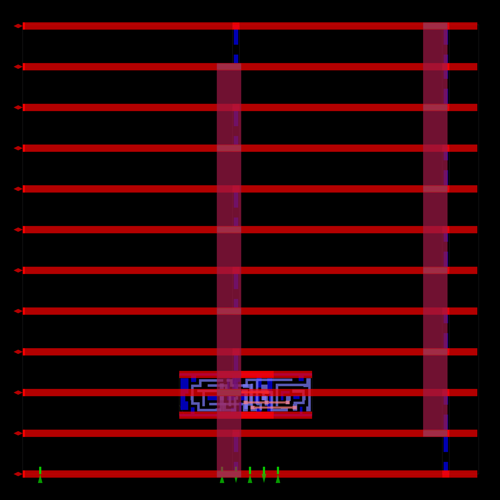

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,50.048 μm²,5.59 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,0.000 uW,0.000 uW,0.000 uW,0.000 uW
combinational,0.000 uW,0.000 uW,0.045 uW,0.045 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,0.000 uW,0.000 uW,0.045 uW,0.045 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Now you can synthesize your own 1-bit Full Adder {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 16495 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 3 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 30 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

### The <code>let</code> keyword.

In the Rust programming language, the <a href = "https://doc.rust-lang.org/std/keyword.let.html"><code>let</code></a> keyword is used to introduce a new set of variables into the current scope.

Here, we will create an 8-bit adder with a carry bit to show how to bind intermediate results.

> Note: With intermediate operations, use a <code>;</code> with the return statement not requiring a colon.

In [ ]:
#@title Together, we will code an example of an 32-bit adder in DSLX with a carry {run:"auto"}

%%dslx --top=adder32_with_carry --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// Adder method goes here
fn adder32_with_carry(a: u32, b:u32) -> (u1, u32){

  // Expand busses from 32 to 33
  let a_with_overflow:u33 = a as u33;
  let b_with_overflow:u33 = b as u33;

  let sum_with_carry:u33 = a_with_overflow + b_with_overflow;

  let sum:u32 = sum_with_carry[0:32];

  // To access one bit, use the notation: address+:u1
  let carry_bit = sum_with_carry[32+:u1];

  // Return result. Note no semicolon. This is a tuple
  (carry_bit, sum)
}

// We will discuss the tests below
#[test]
fn adders_test() {
  assert_eq(adder32_with_carry(u32:41, u32:1), (u1:0, u32:42));
  assert_eq(adder32_with_carry(u32:0xFFFFFFFF, u32:1), (u1:1, u32:0));
  assert_eq(adder32_with_carry(u32:15, u32:0b11111111111111111111111111110110), (u1:1, u32:5));
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] adders_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__adder32_with_carry(a: bits[32], b: bits[32]) -> (bits[1], bits[32]) {
  a_with_overflow: bits[33] = zero_ext(a, new_bit_count=33, id=3)
  b_with_overflow: bits[33] = zero_ext(b, new_bit_count=33, id=4)
  sum_with_carry: bits[33] = add(a_with_overflow, b_with_overflow, id=5, pos=[(0,9,43)])
  literal.7: bits[33] = literal(value=32, id=7, pos=[(0,14,33)])
  carry_bit: bits[1] = dynamic_bit_slice(sum_with_carry, literal.7, width=1, id=8, pos=[(0,14,32)])
  sum: bits[32] = bit_slice(sum_with_carry, start=0, width=32, id=6, pos=[(0,11,30)])
  ret tuple.9: (bits[1], bits[32]) = tuple(carry_bit, sum, id=9, pos=[(0,17,2)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__adder32_with_carry(a: bits[32], b: bits[32]) -> (bits[1], bits[32]) {
  literal.11: bits[1] = literal(value=0, id=11)
  literal.16: bits[1] = literal(value=0, id=16)
  a_with_overflow: bits[33] = concat(literal.11, a, id=12)
  b_with_overflow: bits[33] = concat(literal.16, b, id=14)
  sum_with_carry: bits[33] = add(a_with_overflow, b_with_overflow, id=5, pos=[(0,9,43)])
  carry_bit: bits[1] = bit_slice(sum_with_carry, start=32, width=1, id=15, pos=[(0,14,32)])
  sum: bits[32] = bit_slice(sum_with_carry, start=0, width=32, id=6, pos=[(0,11,30)])
  ret tuple.9: (bits[1], bits[32]) = tuple(carry_bit, sum, id=9, pos=[(0,17,2)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] a,
  input wire [31:0] b,
  output wire [32:0] out
);
  // ===== Pipe stage 0:
  wire [32:0] p0_a_with_overflow_comb;
  wire [32:0] p0_b_with_overflow_comb;
  wire [32:0] p0_sum_with_carry_comb;
  wire p0_carry_bit_comb;
  wire [31:0] p0_sum_comb;
  assign p0_a_with_overflow_comb = {1'h0, a};
  assign p0_b_with_overflow_comb = {1'h0, b};
  assign p0_sum_with_carry_comb = p0_a_with_overflow_comb + p0_b_with_overflow_comb;
  assign p0_carry_bit_comb = p0_sum_with_carry_comb[32];
  assign p0_sum_comb = p0_sum_with_carry_comb[31:0];
  assign out = {p0_carry_bit_comb, p0_sum_comb};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,literal.11,0,0
0,a,0,0
0,literal.23,0,0
0,b,0,0
0,a_with_overflow,0,0
0,b_with_overflow,0,0
0,sum_with_carry,861,861
0,carry_bit,0,861
0,sum,0,861
0,tuple.9,0,861


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__a21oi_1,5
sky130_fd_sc_hd__a221oi_1,1
sky130_fd_sc_hd__a311oi_1,5
sky130_fd_sc_hd__a31oi_1,3
sky130_fd_sc_hd__and2_0,15
sky130_fd_sc_hd__lpflow_inputiso1p_1,14
sky130_fd_sc_hd__lpflow_isobufsrc_1,5
sky130_fd_sc_hd__maj3_1,4
sky130_fd_sc_hd__nand2_1,28
sky130_fd_sc_hd__nand2b_1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,132.0000
num_wire_bits,226.0000
num_pub_wires,132.0000
num_pub_wire_bits,226.0000
num_memories,0.0000
num_memory_bits,0.0000
num_processes,0.0000
num_cells,161.0000
area,1004.7136


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-19.10" *)
module user_module(clk, a, b, out);
  (* src = "/content/xls_work_dir/user_module.sv:3.21-3.22" *)
  input [31:0] a;
  wire [31:0] a;
  (* src = "/content/xls_work_dir/user_module.sv:4.21-4.22" *)
  input [31:0] b;
  wire [31:0] b;
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/xls_work_dir/user_module.sv:5.22-5.25" *)
  output [32:0] out;
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,v,input,external delay
0.000000,0.000000,v,b[1],in
0.060000,0.060000,^,out_sky130_fd_sc_hd__xnor2_1_Y_A_sky130_fd_sc_hd__o21ai_0_A1_A2_sky130_fd_sc_hd__nor2_1_Y/Y,sky130_fd_sc_hd__nor2_1
0.090000,0.150000,v,out_sky130_fd_sc_hd__xnor2_1_Y_A_sky130_fd_sc_hd__o21ai_0_A1/Y,sky130_fd_sc_hd__o21ai_0
0.210000,0.360000,v,out_sky130_fd_sc_hd__xnor2_1_Y_5_A_sky130_fd_sc_hd__maj3_1_C/X,sky130_fd_sc_hd__maj3_1
0.200000,0.570000,v,out_sky130_fd_sc_hd__xnor2_1_Y_28_A_sky130_fd_sc_hd__maj3_1_C/X,sky130_fd_sc_hd__maj3_1
0.200000,0.770000,v,out_sky130_fd_sc_hd__xnor2_1_Y_27_A_sky130_fd_sc_hd__maj3_1_C/X,sky130_fd_sc_hd__maj3_1
0.210000,0.980000,v,out_sky130_fd_sc_hd__xnor2_1_Y_26_A_sky130_fd_sc_hd__maj3_1_C/X,sky130_fd_sc_hd__maj3_1
0.190000,1.170000,^,out_sky130_fd_sc_hd__xor2_1_X_1_A_sky130_fd_sc_hd__a221oi_1_B1/Y,sky130_fd_sc_hd__a221oi_1
0.110000,1.280000,v,out_sky130_fd_sc_hd__xnor2_1_Y_14_B_sky130_fd_sc_hd__and2_0_X_B_sky130_fd_sc_hd__o311ai_0_Y/Y,sky130_fd_sc_hd__o311ai_0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

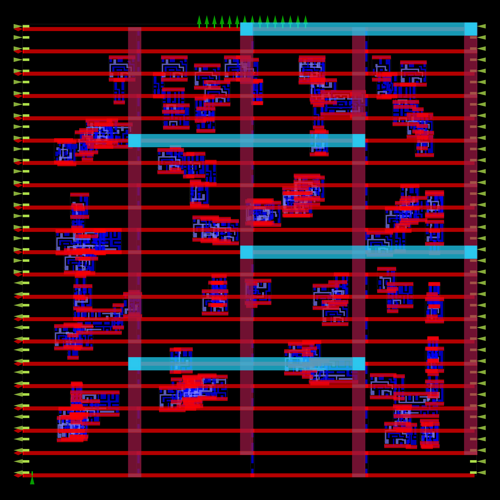

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,1099.805 μm²,36.93 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,0.000 uW,0.000 uW,0.000 uW,0.000 uW
combinational,0.000 uW,0.000 uW,0.969 uW,0.969 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,0.000 uW,0.000 uW,0.969 uW,0.969 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the adder32_with_carry cell {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 55 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

## A moment Architecture "History": The Civilization Error

The Civilization Error (aka "<a href = "https://www.youtube.com/watch?v=Ur3SdgkW8W4">Nuclear Gandhi</a>") is an urban legend of a hardware-software error in the 1991 strategy video game Civilization that would eventually force the pacifist leader Mahatma Gandhi to become extremely aggressive, counter to his real-life nature. The urban legend became so prominent that the creators eventually programmed it into the game.

So what was this "error", and why did the creators claim that it would have been <a href = "https://sidmeiersmemoir.com/">impossible in the original game</a>? Understanding the answer to both requires us combining our understanding of Fundamentals of Computing, Logic Design, and Computer Architecture.

The way the game Civilization works is that you play as a real-life leader and use strategy to build a country. Every leader had an "aggressiveness" score stored in an unsigned 8-bit register, and their aggresiveness score would decrease by 2 if you instituted a democracy.

As the legend goes, Ganhdi had an initial aggressive score of 1, which was put into the ALU as a signed value, so it returned:
> 00000001 + 11111110 = 11111111

We now know that this becomes 2<sup>8</sup> - 1 in unsigned, which is an aggressiveness score of 255.

Modern synthesis tools will address type mismatches and throw an error, in no small part because of errors like the error was just learned about. So here is an example of XLS trying to perform this task.

Here is the error we will see:

<code>XlsTypeError: sN[8] vs uN[8]: Return type of function body for 'civilization_adder' did not match the annotated return type.</code>

Change the expected result from <code>-1</code> to <code>255</code>, and the test will pass.

Because the tools would have caught the type mismatch in synthesis, the "Nuclear Gandhi" error would not have been possible.

In [ ]:
#@title Deliberate Logic Error: Type mismatch - Civilization Error {run:"auto"}

%%dslx --top=civilization_u_adder --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// You will need to change s8 to u8 to pass
fn civilization_u_adder(a: u8) -> s8 {
    a - u8:2
}

#[test]
fn add_test() {
    // Change from s8: -1 to u8: 255 to pass
    assert_eq(civilization_u_adder(u8:1), s8:-1);
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

xls_work_dir/user_module.x:4:38-6:2
0002:   
0003:   // You will need to change s8 to u8 to pass
0004:   fn civilization_u_adder(a: u8) -> s8 {
       ______________________________________^
0005: |     a - u8:2
0006: | }
      |_^ XlsTypeError: uN[8] vs sN[8]: Return type of function body for 'civilization_u_adder' did not match the annotated return type.
0007:   
0008:   #[test]



<IPython.core.display.Javascript object>

AttributeError: 'CompletedProcess' object has no attribute 'err'

In [ ]:
#@title Fixed Error: Signed int mismatch - use s8 instead of u8 {run:"auto"}

%%dslx --top=civilization_s_adder --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn civilization_s_adder(a: s8) -> s8 {
    a - s8:2
}

#[test]
fn add_test() {
    assert_eq(civilization_s_adder(s8:1), s8:-1);
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] add_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__civilization_s_adder(a: bits[8]) -> bits[8] {
  literal.2: bits[8] = literal(value=2, id=2, pos=[(0,3,8)])
  ret sub.3: bits[8] = sub(a, literal.2, id=3, pos=[(0,3,6)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__civilization_s_adder(a: bits[8]) -> bits[8] {
  bit_slice.6: bits[7] = bit_slice(a, start=1, width=7, id=6, pos=[(0,3,6)])
  literal.11: bits[7] = literal(value=127, id=11, pos=[(0,3,6)])
  add.8: bits[7] = add(bit_slice.6, literal.11, id=8, pos=[(0,3,6)])
  bit_slice.9: bits[1] = bit_slice(a, start=0, width=1, id=9, pos=[(0,3,6)])
  ret concat.10: bits[8] = concat(add.8, bit_slice.9, id=10, pos=[(0,3,6)])
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [7:0] a,
  output wire [7:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_add_18_comb;
  assign p0_add_18_comb = a[7:1] + 7'h7f;
  assign out = {p0_add_18_comb, a[0]};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,a,0,0
0,bit_slice.6,0,0
0,literal.11,0,0
0,bit_slice.9,0,0
0,add.8,479,479
0,concat.10,0,479


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## If-Else Statements

We can use <code>if</code>, <code>else if</code>, and <code>else</code> statements in order to perform decisions. For the context of architectural design, we note:
<ul>
  <li>You must have a closing <code>else</code> statement in order to compile to ensure the compiler knows all possible physical cases are covered</li>
</ul>

In [ ]:
%%dslx --top=add_sub_32_with_carry --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// twos_complement method goes here
fn twos_complement( value: u33, bit: u1 ) -> u33{

    if( bit == u1:0 ){
        value
    }
    else{
        let sign_extend_value:u33 = signex(bit, u33:1);

        (value ^ sign_extend_value) + u33:1
    }
}

// add_sub_32_with_carry goes here
fn add_sub_32_with_carry(a: u32, b:u32, add_sub:u1) -> (u1, u32){

  // Expand busses from 32 to 33
  let a_with_overflow:u33 = a as u33;
  let b_with_overflow:u33 = twos_complement( b[31+:u1] ++ b, add_sub );

  let sum_with_carry:u33 = a_with_overflow + b_with_overflow;

  let sum:u32 = sum_with_carry[0:32];

  // To access one bit, use the notation: address+:u1
  let carry_bit = sum_with_carry[32+:u1];

  // Return result. Note no semicolon. This is a tuple
  (carry_bit, sum)
}



// We will write the twos complement test first


// We will uncomment the test after we have run and tested twos_complement and then written add_sub_32_with_carry
//#[test]
//fn adders_test() {

  // Additions
  //assert_eq(add_sub_32_with_carry(u32:41, u32:1, u1:0), (u1:0, u32:42));
  //assert_eq(add_sub_32_with_carry(u32:0xFFFFFFFF, u32:1, u1:0), (u1:0, u32:0));
  //assert_eq(add_sub_32_with_carry(u32:1, u32:0xFFFFFFFF, u1:0), (u1:0, u32:0));

  // Subtractions
  //assert_eq(add_sub_32_with_carry(u32:41, u32:1, u1:1), (u1:0, u32:40));
  //assert_eq(add_sub_32_with_carry(u32:0xFFFFFFFF, u32:1, u1:1), (u1:1, u32:0xFFFFFFFE));
  //assert_eq(add_sub_32_with_carry(u32:0, u32:1, u1:1), (u1:1, u32:0xFFFFFFFF));
  //assert_eq(add_sub_32_with_carry(u32:1, u32:0xFFFFFFFF, u1:1), (u1:0, u32:2));
//}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[===============] 0 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

fn __user_module__twos_complement(value: bits[33], bit: bits[1]) -> bits[33] {
  sign_extend_value: bits[33] = sign_ext(bit, new_bit_count=33, id=6, pos=[(0,9,42)])
  literal.3: bits[1] = literal(value=0, id=3, pos=[(0,5,15)])
  xor.7: bits[33] = xor(value, sign_extend_value, id=7, pos=[(0,11,15)])
  literal.8: bits[33] = literal(value=1, id=8, pos=[(0,11,38)])
  eq.4: bits[1] = eq(bit, literal.3, id=4, pos=[(0,5,12)])
  add.9: bits[33] = add(xor.7, literal.8, id=9, pos=[(0,11,36)])
  literal.5: bits[33] = literal(value=1, id=5, pos=[(0,9,48)])
  ret sel.10: bits[33] = sel(eq.4, cases=[add.9, value], id=10, pos=[(0,5,4)])
}

top fn __user_module__add_sub_32_with_carry(a: bits[32], b: bits[32], add_sub: bits[1]) -> (bits[1], bits[32]) {
  literal.15: bits[32] = literal(value=31, id=15, pos=[(0,20,47)])
  dynamic_bit_slice.16: bits[1] = dynamic_bit_slice(b, literal.15, width=1, id=16, pos=[(0,20,46)])
  concat.17: bits[33] 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__add_sub_32_with_carry(a: bits[32], b: bits[32], add_sub: bits[1]) -> (bits[1], bits[32]) {
  bit_slice.30: bits[1] = bit_slice(b, start=31, width=1, id=30, pos=[(0,20,46)])
  not.45: bits[1] = not(bit_slice.30, id=45, pos=[(0,11,15)])
  not.43: bits[32] = not(b, id=43, pos=[(0,11,15)])
  concat.46: bits[33] = concat(not.45, not.43, id=46, pos=[(0,11,15)])
  literal.34: bits[33] = literal(value=1, id=34, pos=[(0,11,38)])
  literal.27: bits[1] = literal(value=0, id=27)
  concat.17: bits[33] = concat(bit_slice.30, b, id=17, pos=[(0,20,55)])
  add.36: bits[33] = add(concat.46, literal.34, id=36, pos=[(0,11,36)])
  a_with_overflow: bits[33] = concat(literal.27, a, id=28)
  b_with_overflow: bits[33] = sel(add_sub, cases=[concat.17, add.36], id=38, pos=[(0,5,4)])
  sum_with_carry: bits[33] = add(a_with_overflow, b_with_overflow, id=19, pos=[(0,22,43)])
  carry_bit: bits[1] = bit_slice(sum_with_carry, start=

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] a,
  input wire [31:0] b,
  input wire add_sub,
  output wire [32:0] out
);
  // ===== Pipe stage 0:
  wire [32:0] p0_add_68_comb;
  wire [32:0] p0_a_with_overflow_comb;
  wire [32:0] p0_b_with_overflow_comb;
  wire [32:0] p0_sum_with_carry_comb;
  wire p0_carry_bit_comb;
  wire [31:0] p0_sum_comb;
  assign p0_add_68_comb = {~b[31], ~b} + 33'h0_0000_0001;
  assign p0_a_with_overflow_comb = {1'h0, a};
  assign p0_b_with_overflow_comb = add_sub ? p0_add_68_comb : {b[31], b};
  assign p0_sum_with_carry_comb = p0_a_with_overflow_comb + p0_b_with_overflow_comb;
  assign p0_carry_bit_comb = p0_sum_with_carry_comb[32];
  assign p0_sum_comb = p0_sum_with_carry_comb[31:0];
  assign out = {p0_carry_bit_comb, p0_sum_comb};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,b,0,0
0,bit_slice.30,0,0
0,literal.34,0,0
0,literal.27,0,0
0,a,0,0
0,add_sub,0,0
0,concat.17,0,0
0,a_with_overflow,0,0
0,not.45,21,21
0,not.43,21,21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## DSLX Match Statements

DSLX <b>match</b> statements are akin to C switch statements in that their objective is to improve access time to a specific code segment compared if-else decision statement chains.

Like a switch statement, use the <code>match</code> keyword and then the variable to be input:

    <code>match (sign_bit)</code>

> Note: match statementsare quite similar to a C switch statement, but it's more powerful because it match on various patterns, even with aggregate types like tuples, whereas a switch can only match on simple values

Next, correlate the case statement with a <code>=></code> operator to correlate the value to match with the desired outcome. In between cases, put a <code>,</code>. For example:

<code>&nbsp&nbsp&nbspu1:0 => signex(immediate, u32:0),</code>

> Important Note: DSLX Match statements require a <b>trailing irrefutable pattern</b> in order to be properly intertrepeted by the IR. More simple, the final case must be represented as a <code>_</code>, otherwise you will get the following error message:<br>
><br>
><code>IrConversionError: Only matches with trailing irrefutable patterns (i.e. `_ => ...`) are currently supported for IR conversion.</code>


## When to use match vs if-else

<code>match</code> statements are powerful and provide faster synthesis and better results. However, they can only evaluate one element or tuple at a time. If you need to have multiple cases (i.e. using or/and in the case statement), then use an if-else.

Finally, if you are leveraging a match statement to determine an intermediate value to be saved using a <code>let</code> statement, then put that match statement in a module, as we will demonstrate below.

## Case Study: Add/Subtract.

Recall that two's complement is the process of flipping all the bits and then adding 1. And we use that value to perform subtraction. The way this is performed in a computer architecture is to perform an <b>xor</b> on the bits (so if the value was a 0, the output will be a 1, and vice versa) and then use a carry bit into the initial value to represent the "add 1".

We can represent that logic using a match statement:

    fn twos_complement(value: u33, bit:u1) -> u33{
        match(bit){
          u1:0 => value,

          _ => {
            let sign_extend_val:u33 = signex(bit, u33:1);
            (value ^ sign_extend_val) + u33:1
          }
        }
    }

In [ ]:
%%dslx --top=add_sub_32_with_carry --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn twos_complement(value: u33, bit:u1) -> u33{

    // We will write the match statement here
    match(bit){
        u1:0 => value,

        _ => {
            let sign_extend_value:u33 = signex(bit, u33:1);
            (value ^ sign_extend_value) + u33:1
        }
    }

}

fn add_sub_32_with_carry(a: u32, b: u32, add_sub: u1) -> (u1, u32) {

  // Expand both busses from 32 to 33
  let a_with_overflow:u33 = a as u33;
  let b_with_overflow:u33 = twos_complement(b as u33, add_sub);

  let result_with_carry = a_with_overflow + b_with_overflow;

  // Get the first eight bits
  // This notation uses the same notation as range in Python
  // [0:32] actually gets the 32 bits from 0 to 31 where 32 is *exclusive*
  let result = result_with_carry[0:32];

  // To access one bit, use the bit you want and +:u1
  let carry_bit = result_with_carry[32+:u1];

  // Finally, return the sum and carry bit
  (carry_bit, result)
}

#[test]
fn twos_complementtest(){
    assert_eq(twos_complement(u33:42, u1:0), u33:42);
    assert_eq(twos_complement(u33:42, u1:1), u33:0x1FFFFFFD6 );
    assert_eq(twos_complement(u33:0x1FFFFFFFF, u1:0), u33:0x1FFFFFFFF);
    assert_eq(twos_complement(u33:0x1FFFFFFFF, u1:1), u33:1);
}

#[test]
fn adders_test() {

  // Additions
  assert_eq(add_sub_32_with_carry(u32:41, u32:1, u1:0), (u1:0, u32:42));
  assert_eq(add_sub_32_with_carry(u32:0xFFFFFFFF, u32:1, u1:0), (u1:1, u32:0));

  // Subtractions
  assert_eq(add_sub_32_with_carry(u32:41, u32:1, u1:1), (u1:0, u32:40));
  assert_eq(add_sub_32_with_carry(u32:0xFFFFFFFF, u32:1, u1:1), (u1:0, u32:0xFFFFFFFE));
  assert_eq(add_sub_32_with_carry(u32:0, u32:1, u1:1), (u1:1, u32:0xFFFFFFFF));
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] twos_complementtest
[            OK ]
[ RUN UNITTEST  ] adders_test
[            OK ]
[===============] 2 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

fn __user_module__twos_complement(value: bits[33], bit: bits[1]) -> bits[33] {
  literal.3: bits[1] = literal(value=0, id=3, pos=[(0,6,8)])
  eq.4: bits[1] = eq(literal.3, bit, id=4)
  sign_extend_value: bits[33] = sign_ext(bit, new_bit_count=33, id=7, pos=[(0,9,46)])
  concat.11: bits[1] = concat(eq.4, id=11)
  xor.8: bits[33] = xor(value, sign_extend_value, id=8, pos=[(0,10,19)])
  literal.9: bits[33] = literal(value=1, id=9, pos=[(0,10,42)])
  one_hot.12: bits[2] = one_hot(concat.11, lsb_prio=true, id=12)
  add.10: bits[33] = add(xor.8, literal.9, id=10, pos=[(0,10,40)])
  literal.5: bits[1] = literal(value=1, id=5, pos=[(0,8,8)])
  literal.6: bits[33] = literal(value=1, id=6, pos=[(0,9,52)])
  ret one_hot_sel.13: bits[33] = one_hot_sel(one_hot.12, cases=[value, add.10], id=13)
}

top fn __user_module__add_sub_32_with_carry(a: bits[32], b: bits[32], add_sub: bits[1]) -> (bits[1], bits[32]) {
  zero_ext.18: bits[33] = z

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__add_sub_32_with_carry(a: bits[32], b: bits[32], add_sub: bits[1]) -> (bits[1], bits[32]) {
  literal.57: bits[1] = literal(value=1, id=57, pos=[(0,10,19)])
  not.52: bits[32] = not(b, id=52, pos=[(0,10,19)])
  literal.31: bits[1] = literal(value=0, id=31)
  concat.55: bits[33] = concat(literal.57, not.52, id=55, pos=[(0,10,19)])
  literal.42: bits[33] = literal(value=1, id=42, pos=[(0,10,42)])
  literal.59: bits[1] = literal(value=0, id=59)
  concat.32: bits[33] = concat(literal.31, b, id=32)
  add.44: bits[33] = add(concat.55, literal.42, id=44, pos=[(0,10,40)])
  a_with_overflow: bits[33] = concat(literal.59, a, id=34)
  b_with_overflow: bits[33] = sel(add_sub, cases=[concat.32, add.44], id=49, pos=[(0,20,43)])
  result_with_carry: bits[33] = add(a_with_overflow, b_with_overflow, id=20, pos=[(0,22,42)])
  carry_bit: bits[1] = bit_slice(result_with_carry, start=32, width=1, id=38, pos=[(0,30,35)])
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] a,
  input wire [31:0] b,
  input wire add_sub,
  output wire [32:0] out
);
  // ===== Pipe stage 0:
  wire [32:0] p0_add_82_comb;
  wire [32:0] p0_a_with_overflow_comb;
  wire [32:0] p0_b_with_overflow_comb;
  wire [32:0] p0_result_with_carry_comb;
  wire p0_carry_bit_comb;
  wire [31:0] p0_result_comb;
  assign p0_add_82_comb = {1'h1, ~b} + 33'h0_0000_0001;
  assign p0_a_with_overflow_comb = {1'h0, a};
  assign p0_b_with_overflow_comb = add_sub ? p0_add_82_comb : {1'h0, b};
  assign p0_result_with_carry_comb = p0_a_with_overflow_comb + p0_b_with_overflow_comb;
  assign p0_carry_bit_comb = p0_result_with_carry_comb[32];
  assign p0_result_comb = p0_result_with_carry_comb[31:0];
  assign out = {p0_carry_bit_comb, p0_result_comb};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,b,0,0
0,literal.57,0,0
0,literal.31,0,0
0,literal.42,0,0
0,literal.71,0,0
0,a,0,0
0,add_sub,0,0
0,concat.32,0,0
0,a_with_overflow,0,0
0,not.52,21,21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title On your own: write a 4-input multiplexer using match statements {run:"auto"}

%%dslx --top=mux_4_8 --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// Four 8 bith inputs, a two-bit select line and an 8-bit output
// Use a match statement
// Since the top is mux_4_8, be sure to name the function mux_4_8
fn mux_4_8( in0:u8, in1:u8, in2:u8, in3:u8, sel:u2 ) -> u8 {

    match(sel){
        u2:0 => in0,
        u2:1 => in1,
        u2:2 => in2,
        _ => in3
    }
}

// Write four tests:
// Input 0 = 0
// Input 1 = 100
// Input 2 = 75
// Input 3 = 18
// Set select to u2:0, u2:1, u2:2, and u2:3 respectively to get the correct outputs.
#[test]
fn mux_4_8_test(){
    assert_eq(mux_4_8( u8:0, u8:100, u8:75, u8:18, u2:0 ), u8:0 );
    assert_eq(mux_4_8( u8:0, u8:100, u8:75, u8:18, u2:1 ), u8:100 );
    assert_eq(mux_4_8( u8:0, u8:100, u8:75, u8:18, u2:2 ), u8:75 );
    assert_eq(mux_4_8( u8:0, u8:100, u8:75, u8:18, u2:3 ), u8:18 );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] mux_4_8_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__mux_4_8(in0: bits[8], in1: bits[8], in2: bits[8], in3: bits[8], sel: bits[2]) -> bits[8] {
  literal.10: bits[2] = literal(value=2, id=10, pos=[(0,10,8)])
  literal.8: bits[2] = literal(value=1, id=8, pos=[(0,9,8)])
  literal.6: bits[2] = literal(value=0, id=6, pos=[(0,8,8)])
  eq.11: bits[1] = eq(literal.10, sel, id=11)
  eq.9: bits[1] = eq(literal.8, sel, id=9)
  eq.7: bits[1] = eq(literal.6, sel, id=7)
  concat.13: bits[3] = concat(eq.11, eq.9, eq.7, id=13)
  one_hot.14: bits[4] = one_hot(concat.13, lsb_prio=true, id=14)
  literal.12: bits[1] = literal(value=1, id=12, pos=[(0,11,8)])
  ret one_hot_sel.15: bits[8] = one_hot_sel(one_hot.14, cases=[in0, in1, in2, in3], id=15)
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__mux_4_8(in0: bits[8], in1: bits[8], in2: bits[8], in3: bits[8], sel: bits[2]) -> bits[8] {
  literal.50: bits[2] = literal(value=2, id=50, pos=[(0,10,8)])
  literal.51: bits[2] = literal(value=1, id=51, pos=[(0,9,8)])
  bit_slice.23: bits[1] = bit_slice(sel, start=0, width=1, id=23)
  bit_slice.24: bits[1] = bit_slice(sel, start=1, width=1, id=24)
  ne.47: bits[1] = ne(sel, literal.50, id=47)
  ne.48: bits[1] = ne(sel, literal.51, id=48)
  or.49: bits[1] = or(bit_slice.23, bit_slice.24, id=49)
  literal.10: bits[2] = literal(value=2, id=10, pos=[(0,10,8)])
  literal.8: bits[2] = literal(value=1, id=8, pos=[(0,9,8)])
  and.46: bits[1] = and(ne.47, ne.48, or.49, id=46)
  eq.20: bits[1] = eq(sel, literal.10, id=20)
  eq.21: bits[1] = eq(sel, literal.8, id=21)
  nor.27: bits[1] = nor(bit_slice.23, bit_slice.24, id=27)
  concat.31: bits[4] = concat(and.46, eq.20, eq.21, nor.27, id=31)
  ret one_hot_sel.15

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [7:0] in0,
  input wire [7:0] in1,
  input wire [7:0] in2,
  input wire [7:0] in3,
  input wire [1:0] sel,
  output wire [7:0] out
);
  // ===== Pipe stage 0:
  wire [3:0] p0_concat_81_comb;
  assign p0_concat_81_comb = {sel != 2'h2 & sel != 2'h1 & (sel[0] | sel[1]), sel == 2'h2, sel == 2'h1, ~(sel[0] | sel[1])};
  assign out = in0 & {8{p0_concat_81_comb[0]}} | in1 & {8{p0_concat_81_comb[1]}} | in2 & {8{p0_concat_81_comb[2]}} | in3 & {8{p0_concat_81_comb[3]}};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,sel,0,0
0,literal.65,0,0
0,literal.66,0,0
0,bit_slice.23,0,0
0,bit_slice.24,0,0
0,literal.50,0,0
0,literal.51,0,0
0,in0,0,0
0,in1,0,0
0,in2,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📄 README

Like what you see? 🤝 [Contact us](https://docs.google.com/forms/d/e/1FAIpQLSd1DNMoOxxr73mkIrZXhDWd1gn-jSsL7SMQry6y_JK0caDKlg/viewform?resourcekey=0-1YtZY34PHo-vug_UmFrMQg) 💬 [Join the chat](https://chat.google.com/room/AAAA8aUpxQc?cls=4)

# 🔒 Privacy

 `%%dslx` cell execution count is tracked using [Google Analytics](https://developers.google.com/analytics).